In [2]:
import pandas as pd
import numpy as np
from collections  import Counter 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_set=pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')

In [4]:
data_set.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


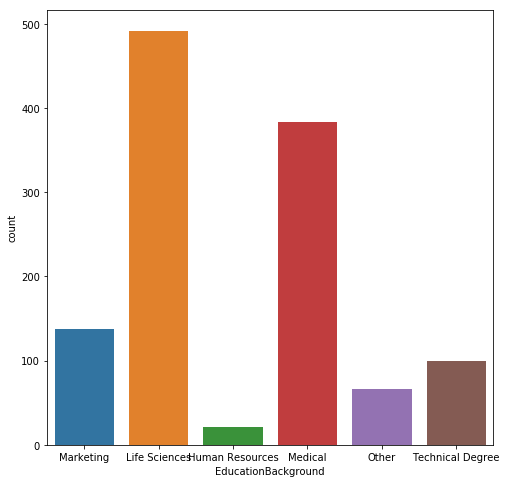

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(x="EducationBackground", data=data)


In [6]:
Counter(data_set.EmpDepartment)

Counter({'Sales': 373,
         'Human Resources': 54,
         'Development': 361,
         'Data Science': 20,
         'Research & Development': 343,
         'Finance': 49})

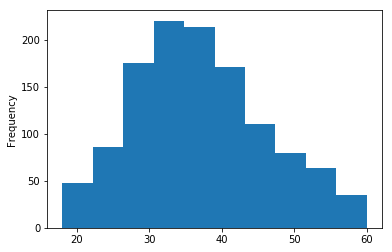

In [7]:
data_set['Age'].plot(kind='hist')

In [8]:
data_set.isnull().any()

EmpNumber                       False
Age                             False
Gender                          False
EducationBackground             False
MaritalStatus                   False
EmpDepartment                   False
EmpJobRole                      False
BusinessTravelFrequency         False
DistanceFromHome                False
EmpEducationLevel               False
EmpEnvironmentSatisfaction      False
EmpHourlyRate                   False
EmpJobInvolvement               False
EmpJobLevel                     False
EmpJobSatisfaction              False
NumCompaniesWorked              False
OverTime                        False
EmpLastSalaryHikePercent        False
EmpRelationshipSatisfaction     False
TotalWorkExperienceInYears      False
TrainingTimesLastYear           False
EmpWorkLifeBalance              False
ExperienceYearsAtThisCompany    False
ExperienceYearsInCurrentRole    False
YearsSinceLastPromotion         False
YearsWithCurrManager            False
Attrition   

In [11]:

#data.PerformanceRating 

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
enc=LabelEncoder()

In [12]:
data_set.EducationBackground= enc.fit_transform(data_set.EducationBackground)
data_set.Gender= enc.fit_transform(data_set.Gender)
data_set.MaritalStatus= enc.fit_transform(data_set.MaritalStatus)
data_set.EmpDepartment= enc.fit_transform(data_set.EmpDepartment)
data_set.EmpJobRole= enc.fit_transform(data_set.EmpJobRole)
data_set.BusinessTravelFrequency= enc.fit_transform(data_set.BusinessTravelFrequency)
data_set.Attrition = enc.fit_transform(data_set.Attrition)
data_set.OverTime= enc.fit_transform(data_set.OverTime)

In [13]:

X=data_set.iloc[:,1:27]
y=data_set.PerformanceRating

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=27)

In [16]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
model=RandomForestClassifier(random_state=10,n_jobs=2,
            oob_score=True,n_estimators=27)

In [18]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=2,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

In [19]:
model.feature_importances_

array([0.02971172, 0.00693028, 0.01544472, 0.01093859, 0.03361675,
       0.04234056, 0.00701439, 0.02931397, 0.02240226, 0.18774545,
       0.03485085, 0.01025775, 0.01551749, 0.01568516, 0.0179752 ,
       0.00545254, 0.20445799, 0.01725582, 0.02795691, 0.01667914,
       0.03091434, 0.03652527, 0.03729412, 0.10491297, 0.03146872,
       0.00733706])

In [20]:
predict=model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
accuracy_score(y_test,predict)

0.95

In [23]:
confusion_matrix(y_test,predict)

array([[ 41,   2,   0],
       [  4, 169,   0],
       [  0,   6,  18]], dtype=int64)

In [24]:
pd.crosstab(y_test,predict)

col_0,2,3,4
PerformanceRating,,,
2,41,2,0
3,4,169,0
4,0,6,18


In [26]:
feature_imp=pd.DataFrame(data=model.feature_importances_*100.0,columns=["GiniValue" ])

In [27]:
feature_imp.index = X.columns
feature_imp.sort_values(["GiniValue"] ,axis=0,ascending=False,inplace=True)

In [28]:
print(feature_imp.head())

                              GiniValue
EmpLastSalaryHikePercent      20.445799
EmpEnvironmentSatisfaction    18.774545
YearsSinceLastPromotion       10.491297
EmpJobRole                     4.234056
ExperienceYearsInCurrentRole   3.729412
